In [1]:
from photutils import datasets
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import glob
from astropy.io import fits
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
from pyspherematch import *

In [2]:
file_list = glob.glob("../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_2_images_standard_stars_variable_stars/*Car*")

In [42]:
file_list[1]

'../../../Dropbox/LCRO_Images_Sem2_2016-17/Mar_2_images_standard_stars_variable_stars\\V 0379 Car-g-003S-B1-20170302@033100.fts'

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


(4096L, 4096L)


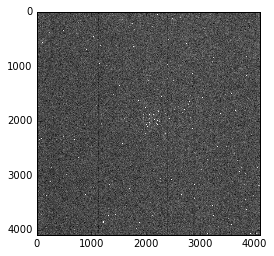

In [3]:
hdu_list = fits.open(file_list[1])
header = fits.getheader(file_list[1])
image_data = hdu_list[0].data
w = WCS(header)
hdu_list.close()
plt.imshow(image_data, cmap='gray', vmin=1957, vmax=2054)
#plt.colorbar()
print np.array(image_data).shape


NAXIS1, NAXIS2 = image_data.shape[0], image_data.shape[1]
#NAXIS2 = 4096
x = np.arange(NAXIS1)
y = np.arange(NAXIS2)
X, Y = np.meshgrid(x, y)
ra, dec = w.wcs_pix2world(X, Y, 0)

In [ ]:
#the variable star is at 158.99383 -58.23767 
#the constant reference star we'll be using is at ... (where)

In [41]:
print np.max(ra), np.min(ra)

159.840191636 158.165906751


In [44]:
idx1, idx2, dis = spherematch([158.99383], [-58.23767], np.ravel(ra[1500:2500, 1500:2500]), np.ravel(dec[1500:2500, 1500:2500]),nnearest=1)
print dis
variable_X, variable_Y = np.ravel(X[1500:2500, 1500:2500])[idx2][0], np.ravel(Y[1500:2500, 1500:2500])[idx2][0]


idx1, idx2, dis = spherematch([158.94423], [-58.23659], np.ravel(ra[1500:2500, 1500:2500]), np.ravel(dec[1500:2500, 1500:2500]),nnearest=1)
print dis
star_X, star_Y = np.ravel(X[1500:2500, 1500:2500])[idx2][0], np.ravel(Y[1500:2500, 1500:2500])[idx2][0]

[  8.37948722e-05]
[ 0.00011506]


In [ ]:
from photutils import CircularAperture, aperture_photometry, background
#image_data = image_data - np.median(image_data)
bkg = background.Background2D(image_data, box_size=256)
positions = [(variable_X, variable_Y), (star_X, star_Y)]
apertures = CircularAperture(positions, r=3.)
phot_table = aperture_photometry(image_data-bkg, apertures)

In [ ]:
phot_table